Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[-1.58610317e-01 -1.60365437e-01 -2.07013747e-01  1.15072318e-01
  1.32585310e-01 -4.56926586e-02  1.60506162e-02 -8.52114767e-02
  1.61357555e-02 -1.24969278e-01  8.31034226e-02 -2.46961592e-02
 -1.03201691e-01 -1.33713565e-02  3.33281580e-02  3.73062801e-02
  3.42424000e-02  3.10871934e-02 -3.30141622e-01 -3.18616609e-02
  1.45466911e-01 -5.65229327e-02 -2.85262459e-01 -1.20231532e-01
  2.04783857e-01 -1.22942621e-01 -3.20369437e-01  1.10489827e-01
  4.14942209e-15 -2.65819484e-15 -4.66979729e-02 -7.29826054e-02
 -1.07780672e-01 -1.24234383e-01  8.48173391e-02  2.84865949e-02
  2.42628217e-02  1.96138142e-01 -8.22182186e-02 -1.14654442e-01
  9.02190144e-02  4.13778906e-03  2.13626510e-02  1.15298766e-01
  1.46624959e-01  9.48816279e-02 -1.14244740e-01  9.72712694e-03
 -3.58115009e-02 -7.92781675e-02  2.40814257e-02 -5.81649717e-02
  2.88260836e-01 -2.925533

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Size of both the clusters are :  41 and  21


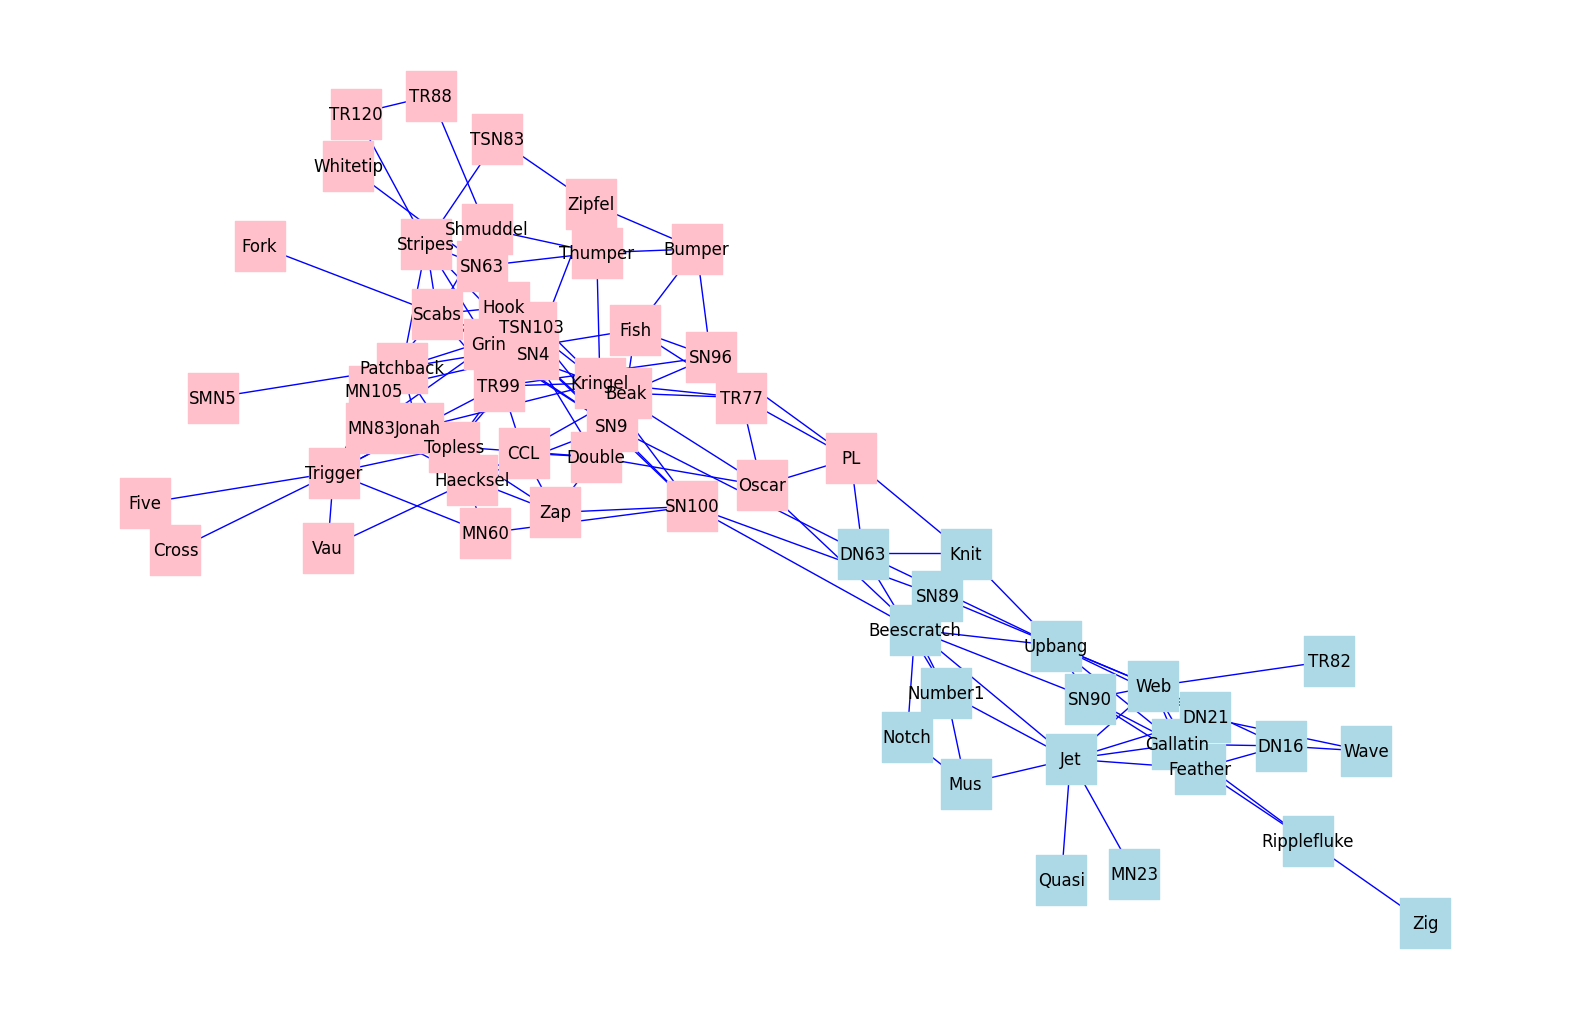

In [2]:
def main():
#All Imports
  import pandas as pd
  import numpy as np
  import networkx as nx
  from sklearn.cluster import KMeans
  from matplotlib.pyplot import figure
  import matplotlib.pyplot as plt
  import sys

#Get the data
  from google.colab import drive
  drive.mount('/content/drive')
  path = "/content/drive/MyDrive/dolphins/dolphins.gml"
  #path = "../data/dolphins/dolphins.gml"
  data=nx.read_gml(path)

#do all the Initializations
  d={}
  sort_d={}
  n_n = {}
  cluster1=[]
  cluster0=[]
  np.set_printoptions(threshold=sys.maxsize)
# Get the nodes and edges from the data
  dolphins_nodes = np.asarray(data.nodes)
  dolphins_edges = np.asarray(data.edges)

#set position for networkx graph plot, fix the seed value so the graph do not change in every run
  p = nx.spring_layout(data, seed = 80)

#Convert the data imported to matrix format
  #data_to_matrix = nx.to_numpy_matrix(data)
  data_to_matrix = nx.to_numpy_array(data)

#Initialize the Identity matrix with the same shape as the data matrix
  I = np.identity(data_to_matrix.shape[0])
  dolphin_D = np.zeros([data_to_matrix.shape[0],data_to_matrix.shape[1]])

#Get the diagonal matrix
  for i in range(data_to_matrix.shape[0]):
      for j in range(data_to_matrix.shape[1]):
          if i==j:
              dolphin_D[i][j] = data_to_matrix.sum(axis=1)[i]
  for i in range(data_to_matrix.shape[0]):
      dolphin_D[i][i] = 1/np.sqrt(dolphin_D[i][i])

#Get the normalised laplacian matrix
  aaa = np.dot(dolphin_D,data_to_matrix)
  lap = I - np.dot(aaa, dolphin_D)
  #print(lap)
#Get the Eigen vector and Eigen Values of the Laplacian
  eig_val=np.linalg.eigh(lap)[0]
  eig_vec=np.linalg.eigh(lap)[1]
  sort_val = np.argsort(eig_val)
  eig_vec = eig_vec[:,sort_val]
  eig_val = eig_val[sort_val]
  print(eig_vec[1])
#Get the Fiedler vector
  fiedler_data = np.asarray(eig_vec[1])[0]
  print(fiedler_data)
#Get the Kmeans
  kmeans_all = KMeans(n_clusters=2).fit(eig_vec[:,1:2])

#Get the 1st cluster numbers and  the respective cluster names for the respective cluster value
  for i in range(len(kmeans_all.labels_)):
      if (kmeans_all.labels_[i]==1):
          cluster1.append(i)
  dolphins_cluster1 = [dolphins_nodes[i] for i in cluster1]

# Get the 2nd cluster numbers and  the respective cluster names for the respective cluster value
  for i in range(len(kmeans_all.labels_)):
      if (kmeans_all.labels_[i]==0):
          cluster0.append(i)
  dolphins_cluster0 = [dolphins_nodes[i] for i in cluster0]

#Specify the Plot size
  plt.figure(1,figsize=(20,13))

#Create a dictonary to pass it to draw_networkx_labels, to print the labels
  for i in range(len(dolphins_nodes)):
      n_n[dolphins_nodes[i]] = dolphins_nodes[i]

#Plot the graph represention in two different colors for the two different clusters
  nx.draw_networkx_nodes(data, p, dolphins_cluster1, node_color='pink', node_shape='s', node_size=1300)
  nx.draw_networkx_nodes(data,  p, dolphins_cluster0, node_color='lightblue', node_shape='s', node_size=1300)
  nx.draw_networkx_edges(data,  p, edge_color = 'blue')
  nx.draw_networkx_labels(data, p, labels=n_n, font_size=12)
  plt.axis(False)

  print("Size of both the clusters are : " , len(dolphins_cluster1), "and ",len(dolphins_cluster0) )
  #print(dolphins_cluster0)
  #print(dolphins_cluster0)

if __name__ == "__main__":
    main()